# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

#load data
df = pd.read_csv("train.csv")

#view first 5 rows
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
#cheack the shape
df.shape

(333, 15)

In [4]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
#choose 3 variables
three_vars = ['crim', 'nox', 'ptratio']

#get mean, median, std, 80th quantile for three chosen variables
for col in three_vars:
    print(f'Mean {col}: {df[col].mean()}')
    print(f'Median {col}: {df[col].median()}')
    print(f'Std Dev {col}: {df[col].std()}')
    print(f'80th quant {col}: {df[col].quantile(.8)} \n')

Mean crim: 3.360341471471471
Median crim: 0.26169000000000003
Std Dev crim: 7.3522718367811075
80th quant crim: 5.256538000000002 

Mean nox: 0.557144144144145
Median nox: 0.5379999999999999
Std Dev nox: 0.11495450830289299
80th quant nox: 0.6679999999999999 

Mean ptratio: 18.448048048047994
Median ptratio: 19.0
Std Dev ptratio: 2.151821329439083
80th quant ptratio: 20.2 



In [16]:
#create some subsets
#split based on median distance to boston business center
long_commute = df[df['dis']>=df.dis.median()]
short_commute = df[df['dis']<df.dis.median()]

#split by chas (near charles river or not)
near_river = df[df['chas']==1]
not_near_river = df[df['chas']==0]

#split by proportion = 80% of buildings built prior to 1940
#if 80% or greater, then old neighbourhood
old_hood = df[df['age']>=80]
new_hood = df[df['age']<80]

#dictionary for dfs
subset_dict = {'long_commute':long_commute, 'short_commute':short_commute,'near_river':near_river,'not_near_river':not_near_river,'old_hood':old_hood,'new_hood':new_hood}

#shape of each df
for x in subset_dict.values():
    print(x.shape)

(167, 15)
(166, 15)
(20, 15)
(313, 15)
(155, 15)
(178, 15)


#### I expect that crime rate will be higher in old neighbourhoods, higher in longer commuting areas, and not sure about the river
#### i expect nox to be higher in old neighbourhoods, lower in shorter commuting niehgbourhoods (more dense) and lower near the river
#### I expect the pupil to teacher ratio to be higher in 

In [51]:
#assign dummies to df based on splits above
df.loc[df['dis'] >= df['dis'].median(), 'long_commute'] = 1
df.loc[df['dis'] < df['dis'].median(), 'long_commute'] = 0
#don't need to do chas, already a dummy
df.loc[df['age']>=80, 'old_hood'] = 1
df.loc[df['age']<80, 'old_hood'] = 0

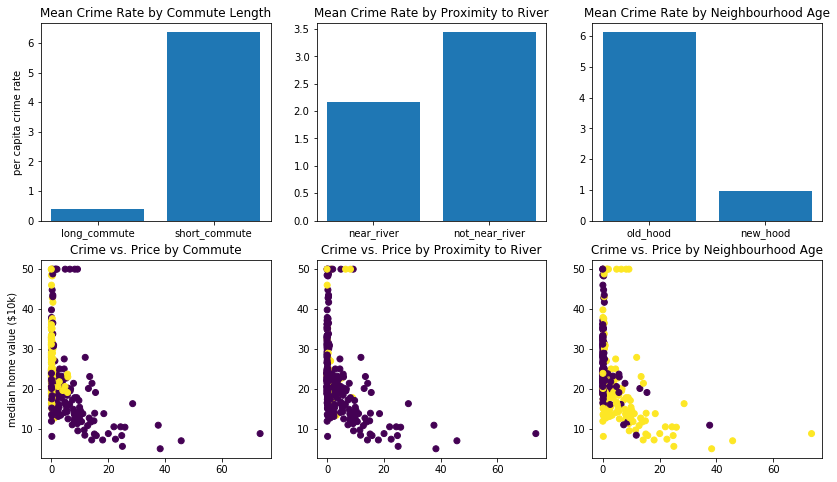

In [58]:
#bar graphs first. make a subplot for three
fig = plt.figure(figsize = (14,8))
        
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

#bar plots
ax1.bar(x = ['long_commute', 'short_commute'], 
        height = [long_commute['crim'].mean(), short_commute['crim'].mean()])
ax2.bar(x = ['near_river', 'not_near_river'],
        height = [near_river['crim'].mean(), not_near_river['crim'].mean()])
ax3.bar(x = ['old_hood', 'new_hood'],
        height = [old_hood['crim'].mean(), new_hood['crim'].mean()])

ax1.set_title('Mean Crime Rate by Commute Length')
ax2.set_title('Mean Crime Rate by Proximity to River')
ax3.set_title('Mean Crime Rate by Neighbourhood Age')

ax1.set_ylabel('per capita crime rate')
#scatter plots
ax4.scatter(x = df['crim'],
            y = df['medv'],
            c = df['long_commute'])
ax5.scatter(x = df['crim'],
            y = df['medv'],
            c = df['chas'])
ax6.scatter(x = df['crim'],
            y = df['medv'],
            c = df['old_hood'])

ax4.set_title('Crime vs. Price by Commute')
ax5.set_title('Crime vs. Price by Proximity to River')
ax6.set_title('Crime vs. Price by Neighbourhood Age')

ax4.set_ylabel("median home value ($10k)")
plt.show()

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!